In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib ipympl
import sys

import hydra
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
import torchaudio
import lightning.pytorch as pl
from scipy.stats import gaussian_kde
from omegaconf import OmegaConf
import matplotlib.pyplot as plt
import numpy as np


from IPython.display import Audio, display

from pathlib import Path
from egaznepy.visualize import apply_plot_style
from src.data.mocha_timit_datamodule import MTIMITDataModule
from src.models.pitch_module import PitchModule
from src.models.components.metrics import RCAMetric
from torchmetrics.classification.accuracy import Accuracy



apply_plot_style(0.9)
plt.rcParams['text.usetex'] = False

root_dir = Path(globals()['_dh'][0]).parent
print(root_dir)
import os
os.chdir(root_dir)

config_path_predict_joint = 'logs/train/runs/2024-08-07_10-26-10_FINAL_joint_train_and_test_with_timit_wo_lpc/.hydra/config.yaml'
ckpt_path_joint = 'logs/train/runs/2024-08-07_10-26-10_FINAL_joint_train_and_test_with_timit_wo_lpc/checkpoints/epoch_068.ckpt'

config_path_predict_xcorr_with_lpc = 'logs/train/runs/2024-07-31_13-48-47_FINAL_xcorr_with_lpc_train_and_test_with_timit/.hydra/config.yaml'
ckpt_path_xcorr_with_lpc = 'logs/train/runs/2024-07-31_13-48-47_FINAL_xcorr_with_lpc_train_and_test_with_timit/checkpoints/epoch_010.ckpt'

config_path_predict_xcorr_wo_lpc = 'logs/train/runs/2024-07-31_13-32-31_FINAL_xcorr_model_wo_lpc_train_and_test_with_timit/.hydra/config.yaml'
ckpt_path_xcorr_wo_lpc = 'logs/train/runs/2024-07-31_13-32-31_FINAL_xcorr_model_wo_lpc_train_and_test_with_timit/checkpoints/epoch_085.ckpt'

config_path_predict_if = 'logs/train/runs/2024-07-31_12-33-06_FINAL_if_model_train_and_test_with_timit/.hydra/config.yaml'
ckpt_path_if = 'logs/train/runs/2024-07-31_12-33-06_FINAL_if_model_train_and_test_with_timit/checkpoints/epoch_094.ckpt'


/dataHDD/chsaikeerthi/2024-chirumamilla


In [2]:
config_predict_joint = OmegaConf.load(config_path_predict_joint)
datamodule_joint = hydra.utils.instantiate(config_predict_joint.data, slice_length=50, batch_size= 4,slice=False)
pitch_module_joint: PitchModule = hydra.utils.instantiate(config_predict_joint.model)

config_predict_xcorr_with_lpc = OmegaConf.load(config_path_predict_xcorr_with_lpc)
datamodule_xcorr_with_lpc = hydra.utils.instantiate(config_predict_joint.data, slice_length=50, batch_size = 4,slice=False)
pitch_module_xcorr_with_lpc: PitchModule = hydra.utils.instantiate(config_predict_xcorr_with_lpc.model)

config_predict_xcorr_wo_lpc = OmegaConf.load(config_path_predict_xcorr_wo_lpc)
datamodule_xcorr_wo_lpc = hydra.utils.instantiate(config_predict_joint.data, slice_length=50, batch_size = 4,slice=False)
pitch_module_xcorr_wo_lpc: PitchModule = hydra.utils.instantiate(config_predict_xcorr_wo_lpc.model)

config_predict_if = OmegaConf.load(config_path_predict_if)
datamodule_if = hydra.utils.instantiate(config_predict_joint.data, slice_length=50,batch_size = 4, slice=False)
pitch_module_if: PitchModule = hydra.utils.instantiate(config_predict_if.model)


del config_predict_joint.trainer.default_root_dir
del config_predict_xcorr_with_lpc.trainer.default_root_dir
del config_predict_xcorr_wo_lpc.trainer.default_root_dir

del config_predict_if.trainer.default_root_dir

config_predict_joint.trainer.limit_predict_batches = 1
config_predict_xcorr_with_lpc.trainer.limit_predict_batches = 1
config_predict_xcorr_wo_lpc.trainer.limit_predict_batches = 1
config_predict_if.trainer.limit_predict_batches = 1



trainer_joint = hydra.utils.instantiate(config_predict_joint.trainer) 
trainer_xcorr_with_lpc = hydra.utils.instantiate(config_predict_xcorr_with_lpc.trainer)
trainer_xcorr_wo_lpc = hydra.utils.instantiate(config_predict_xcorr_wo_lpc.trainer)

trainer_if = hydra.utils.instantiate(config_predict_if.trainer)

arr_predict_joint = trainer_joint.predict(model=pitch_module_joint, datamodule=datamodule_joint, ckpt_path=ckpt_path_joint)
arr_predict_xcorr_with_lpc = trainer_xcorr_with_lpc.predict(model=pitch_module_xcorr_with_lpc, datamodule=datamodule_xcorr_with_lpc, ckpt_path=ckpt_path_xcorr_with_lpc)
arr_predict_xcorr_wo_lpc = trainer_xcorr_wo_lpc.predict(model=pitch_module_xcorr_wo_lpc, datamodule=datamodule_xcorr_wo_lpc, ckpt_path=ckpt_path_xcorr_wo_lpc)

arr_predict_if = trainer_if.predict(model=pitch_module_if, datamodule=datamodule_if, ckpt_path=ckpt_path_if)

/dataHDD/chsaikeerthi/2024-chirumamilla/myenv/lib/python3.10/site-packages/lightning/pytorch/utilities/parsing.py:199: Attribute 'extractor' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['extractor'])`.
/dataHDD/chsaikeerthi/2024-chirumamilla/myenv/lib/python3.10/site-packages/lightning/pytorch/utilities/parsing.py:199: Attribute 'encoder' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['encoder'])`.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
`Trainer(limit_predict_batches=1)` was configured so 1 batch will be used.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
`Trainer(limit_pr

Preparing data...
Data directory: data/
Should implement the code to check if data is already downloaded and extracted for TIMIT
Data prepared successfully.
Data folder: data/TIMIT


Restoring states from the checkpoint path at logs/train/runs/2024-08-07_10-26-10_FINAL_joint_train_and_test_with_timit_wo_lpc/checkpoints/epoch_068.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


batch_size 4
Train set length: 5039
Validation set length: 630
Test set length: 629
Data set-up done successfully.


Loaded model weights from the checkpoint at logs/train/runs/2024-08-07_10-26-10_FINAL_joint_train_and_test_with_timit_wo_lpc/checkpoints/epoch_068.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

Preparing data...
Data directory: data/
Should implement the code to check if data is already downloaded and extracted for TIMIT
Data prepared successfully.
Data folder: data/TIMIT


Restoring states from the checkpoint path at logs/train/runs/2024-07-31_13-48-47_FINAL_xcorr_with_lpc_train_and_test_with_timit/checkpoints/epoch_010.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]
Loaded model weights from the checkpoint at logs/train/runs/2024-07-31_13-48-47_FINAL_xcorr_with_lpc_train_and_test_with_timit/checkpoints/epoch_010.ckpt


batch_size 4
Train set length: 5039
Validation set length: 630
Test set length: 629
Data set-up done successfully.


Predicting: |          | 0/? [00:00<?, ?it/s]

Preparing data...
Data directory: data/
Should implement the code to check if data is already downloaded and extracted for TIMIT
Data prepared successfully.
Data folder: data/TIMIT


Restoring states from the checkpoint path at logs/train/runs/2024-07-31_13-32-31_FINAL_xcorr_model_wo_lpc_train_and_test_with_timit/checkpoints/epoch_085.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]
Loaded model weights from the checkpoint at logs/train/runs/2024-07-31_13-32-31_FINAL_xcorr_model_wo_lpc_train_and_test_with_timit/checkpoints/epoch_085.ckpt


batch_size 4
Train set length: 5039
Validation set length: 630
Test set length: 629
Data set-up done successfully.


Predicting: |          | 0/? [00:00<?, ?it/s]

Preparing data...
Data directory: data/
Should implement the code to check if data is already downloaded and extracted for TIMIT
Data prepared successfully.
Data folder: data/TIMIT


Restoring states from the checkpoint path at logs/train/runs/2024-07-31_12-33-06_FINAL_if_model_train_and_test_with_timit/checkpoints/epoch_094.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]
Loaded model weights from the checkpoint at logs/train/runs/2024-07-31_12-33-06_FINAL_if_model_train_and_test_with_timit/checkpoints/epoch_094.ckpt


batch_size 4
Train set length: 5039
Validation set length: 630
Test set length: 629
Data set-up done successfully.


Predicting: |          | 0/? [00:00<?, ?it/s]

In [3]:
# Extract the first 4 elements - our model

pitches_joint = arr_predict_joint[0][0:4]
pitches_xcorr_with_lpc = arr_predict_xcorr_with_lpc[0][0:4]
pitches_xcorr_wo_lpc = arr_predict_xcorr_wo_lpc[0][0:4]

pitches_if = arr_predict_if[0][0:4]
print("joint",pitches_joint.shape)
print("xcorr_with_lpc",pitches_xcorr_with_lpc.shape)
print("xcorr_wo_lpc",pitches_xcorr_wo_lpc.shape)
print("if",pitches_if.shape)



# gt
corresponding_data = next(iter(datamodule_joint.test_dataloader()))
corresponding_audio = corresponding_data[0][0:4]
pitches_gt = corresponding_data[1][0:4]
probs_gt = corresponding_data[2][0:4]
mask_gt = probs_gt > 0.3
pitches_gt = pitch_module_joint.decoder.idx_pitch[pitches_gt.argmax(dim=-1)]


#pitches_gt = pitches_gt * mask_gt


print("pitches_shape",pitches_gt.shape)
print("probs_shape",probs_gt.shape)

joint torch.Size([4, 381])
xcorr_with_lpc torch.Size([4, 381])
xcorr_wo_lpc torch.Size([4, 381])
if torch.Size([4, 381])
pitches_shape torch.Size([4, 381])
probs_shape torch.Size([4, 381])


RC Accuracy for joint: 0.9566563367843628
RC Accuracy for xcorr_with_lpc: 0.2198142409324646
RC Accuracy for xcorr_wo_lpc: 0.9365324974060059
RC Accuracy for if: 0.9442724585533142


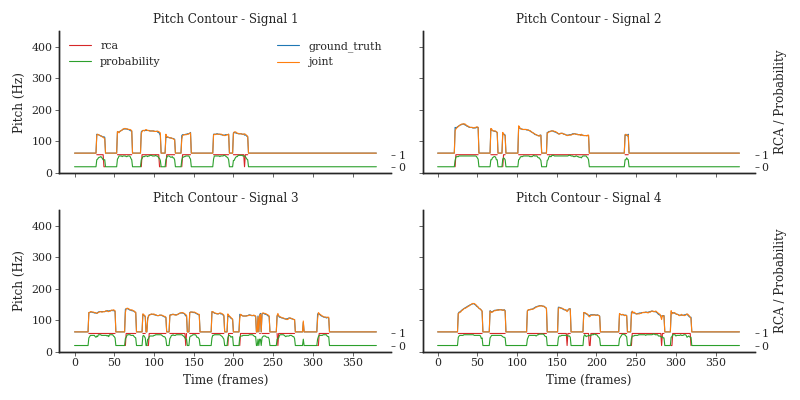

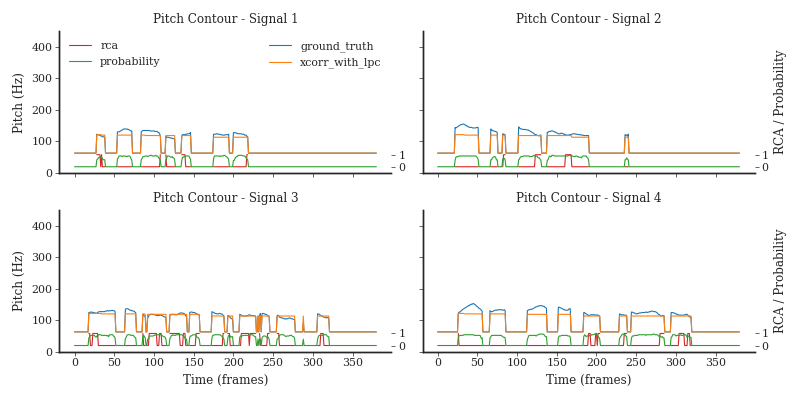

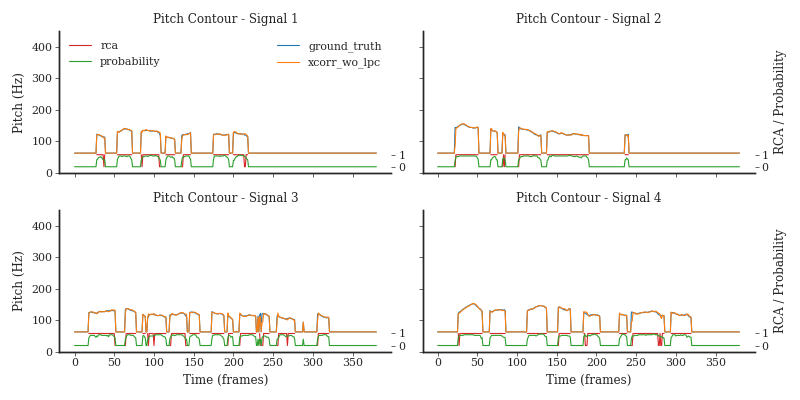

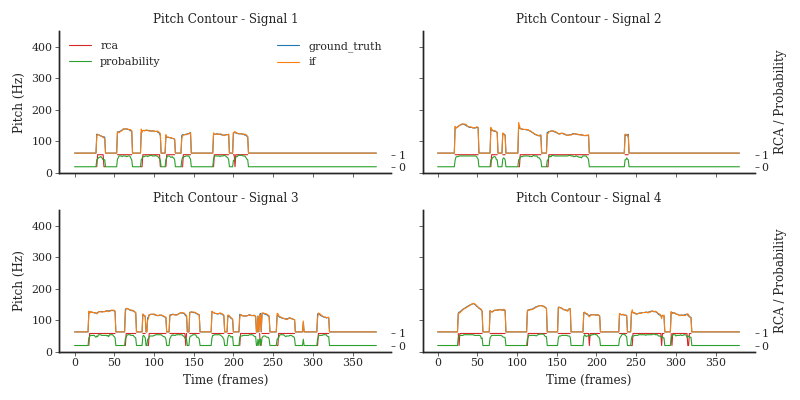

In [5]:
def plot_pitch_line_subplots(filename=None, **model_pitches):
    num_signals = len(list(model_pitches.values())[0])
    num_rows = num_signals // 2
    num_cols = (num_signals + 1) // 2  # Ensure enough columns to fit all subplots

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(4*num_cols, 2*num_rows), sharex=True, sharey=True)
    axs = axs.flatten()

    for i, ax in enumerate(axs):
        if i < num_signals:
            ax_rca = ax.twinx()

            ax.set_title(f'Pitch Contour - Signal {i + 1}')
            ax_rca.tick_params(axis='y')
            for model_name, pitches in model_pitches.items():
                if model_name in ['rca', 'probability']:
                    color = 'tab:red' if model_name == 'rca' else 'tab:green'
                    ax_rca.plot(pitches[i], label=model_name,color=color)
                    
                else:
                    ax.plot(pitches[i], label=model_name)
        if i == 0:
            ax.set_ylabel('Pitch (Hz)')
            ax.legend(loc='upper right')  
            ax_rca.legend(loc='upper left') 
        elif i==1:
            ax_rca.set_ylabel('RCA / Probability') 
        elif i == 2:
            ax.set_xlabel('Time (frames)')
            ax.set_ylabel('Pitch (Hz)')
        else:
            ax.set_xlabel('Time (frames)')
            ax_rca.set_ylabel('RCA / Probability')
        
             
        ax.set_ylim(0, 450)  
        ax_rca.set_ylim(-0.5, 11.25)  
        ax_rca.set_yticks(np.linspace(0, 1, 2))
        ax_rca.grid(False)
        ax.grid(False)
          

    plt.tight_layout()

    if filename:
        plt.savefig(filename, format='pdf')
    else:
        plt.show()

# Example usage
for key, eval_data in {'joint': pitches_joint, 'xcorr_with_lpc': pitches_xcorr_with_lpc,'xcorr_wo_lpc': pitches_xcorr_wo_lpc,  'if': pitches_if}.items():
    pitches = eval_data * mask_gt
    pitches = torch.where(pitches == 0, torch.tensor(62.5), pitches)

    rca = RCAMetric(test_mode=True)
    out, mask = rca.compute_rca_per_frame(pitches, pitches_gt, probs_gt)
    metric = rca(pitches, pitches_gt, probs_gt)

    result = torch.where(out, torch.tensor(1.0), torch.tensor(0))
    result = torch.where(mask, result, torch.nan)
    torch.set_printoptions(threshold=None)

    print(f'RC Accuracy for {key}: {metric}')

    # Plotting each of the first 4 elements
    plot_pitch_line_subplots(ground_truth=pitches_gt, rca=result, **{key: eval_data}, probability=probs_gt, filename=f'pitch_contours_{key}_timit.pdf')
      
    